# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC

In [3]:
# include your Project 1 Decision Tree Model as well
#from DT_ import DecisionTreeModel
pass

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [4]:
df = pd.read_csv("wine-tasting.csv")
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,0.47,9.6,white,very acidic,normal
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,0.45,11.0,white,quite acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

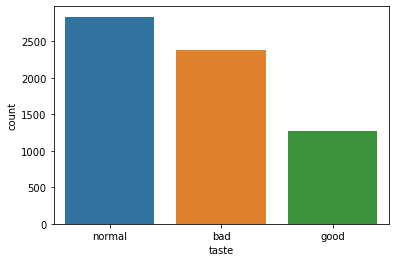

In [5]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

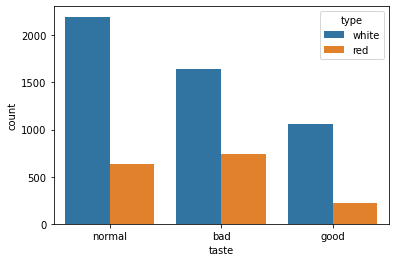

In [6]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

***And answer the following questions based on what you observe from your model building process***

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

In [7]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,0.47,9.6,white,very acidic,normal
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,0.45,11.0,white,quite acidic,normal


In [8]:
df.shape

(6498, 13)

#### Important to Note that the shape has three more features that are not include above. This is due to the fact that the .describe() function only works on continous variables. 

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
count,6497.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,7.215307,0.339657,0.318650,5.442659,0.056038,30.523853,115.745691,0.996135,0.531251,10.492156
std,1.296434,0.164625,0.145313,4.757664,0.035032,17.748427,56.517576,0.116587,0.148801,1.192964
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.125000,0.992340,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000


### Checking for Null Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6498 non-null   float64
 2   citric acid           6498 non-null   float64
 3   residual sugar        6498 non-null   float64
 4   chlorides             6498 non-null   float64
 5   free sulfur dioxide   6498 non-null   float64
 6   total sulfur dioxide  6498 non-null   float64
 7   density               6498 non-null   float64
 8   sulphates             6498 non-null   float64
 9   alcohol               6498 non-null   float64
 10  type                  6498 non-null   object 
 11  pHValue               6498 non-null   object 
 12  taste                 6498 non-null   object 
dtypes: float64(10), object(3)
memory usage: 660.1+ KB


In [11]:
df.isnull().any()

fixed acidity            True
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

In [12]:
df.isnull().sum()

fixed acidity           1
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64

In [13]:
# Percentage of null values per columns
((df.isnull().sum() / len(df)) * 100).round(2)

fixed acidity           0.02
volatile acidity        0.00
citric acid             0.00
residual sugar          0.00
chlorides               0.00
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
sulphates               0.00
alcohol                 0.00
type                    0.00
pHValue                 0.00
taste                   0.00
dtype: float64

In [14]:
print(df[df['fixed acidity'].isnull()].shape)
## just to ensure seems weird
df['fixed acidity'].isnull().sum()

(1, 13)


1

#### There is one null value in our dataset; getting rid of the one(1) value should not cause any issues

In [15]:
## For User Readability
## .set(using the rc=) parameter 
sns.set(rc = {'figure.figsize':(12,4)})

#### Important to Note that due to the small amount of null values in the dataset, the heatmap below does not due the best job of displaying it.

<AxesSubplot:>

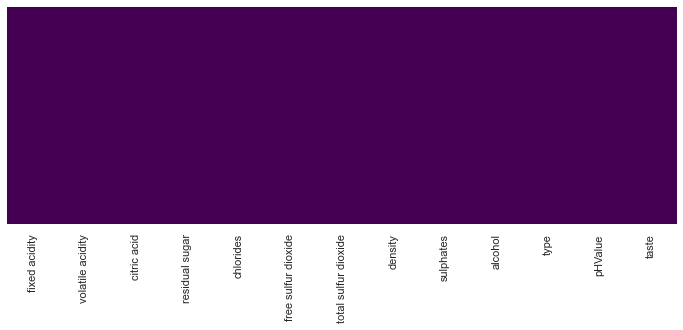

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
df.dropna(inplace=True)

In [18]:
df['fixed acidity'].isnull().sum()

0

In [19]:
## Sanity Check 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64

#### DataSet is now clear of Null Values, let us continue and check for outliers using boxplots and intuition

In [20]:
duplicate = df.duplicated().value_counts()
duplicate

False    5320
True     1177
dtype: int64

#### These are the total number of rows that are in our dataframe, that are unique 

In [21]:
non_duplicates = len(df) - duplicate[True]
non_duplicates

5320

#### Let Us Get Rid of these duplicated values as they can introduce 

In [22]:
df = df.drop_duplicates()

#### Let us Check to Ensure That We Dropped Those Rows that Will Introduce the Bias into the Model

In [23]:
df.duplicated().sum()

0

#### Our Dataset now contains only unique rows in our DataFrame

In [24]:
print('Our New Length of Our DataFrame is: {}'.format(len(df)))

Our New Length of Our DataFrame is: 5320


####  Now Let Us Check For Outliers -- Let us Transform the 'LABEL' we are trying to classify for, with the specifications laid out prior. In order to do this, we must transform our 'taste' feature space as currently it is split into three categorical variables.

In [25]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
taste                    object
dtype: object

#### We are to use the numerical value for 'taste' indicating 1-Good, and 0-ELSE(i.e. this includes anything that isn't good taste). Let us pay attention to only the good taste. THIS MAY introduce some bias, and overfitting due to the fact that there is such a large count difference between good and not good tasting wine(regardless of color)

#### In order to work with this dataset, we need to transform it by getting rid of the categorical variables and encoding them into binary values. As stated we only care about good and not good tasting classification of wines. We then drop the 'taste' feature from our dataset and only work with 'good_taste. In order to work with features: 'pHValue' and 'taste' we will need to transform those as well.

In [26]:
df['good_taste'] = df['taste'].apply(lambda x: 1 if x == str('good')else 0)
df = df.drop('taste',axis=1)

In [27]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
good_taste                int64
dtype: object

<AxesSubplot:xlabel='good_taste', ylabel='count'>

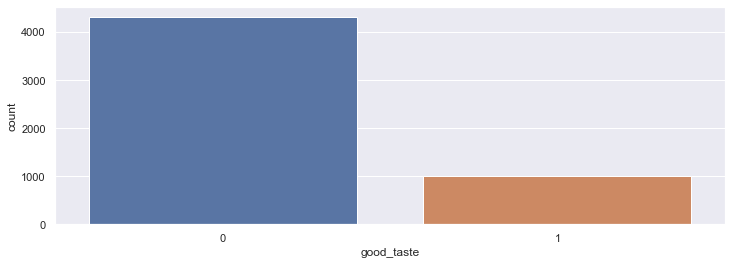

In [28]:
sns.countplot(df['good_taste'])

In [29]:
good_count = df['good_taste'].value_counts()[1]
bad_count = df['good_taste'].value_counts()[0]
print('Good Count:{} and Bad Count:{} and the proportion of Good to Bad Count is:{}'.format(good_count,bad_count,good_count/bad_count*100))

Good Count:1009 and Bad Count:4311 and the proportion of Good to Bad Count is:23.405242403154723


#### Now that we have binary encoded the 'label' we are looking for, let us focus on sanitizing for outliers

In [30]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.996293,0.533357,10.549241,0.189662
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.128844,0.149743,1.185933,0.392070
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,0.430000,9.500000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,0.510000,10.400000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,0.600000,11.400000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000,1.000000


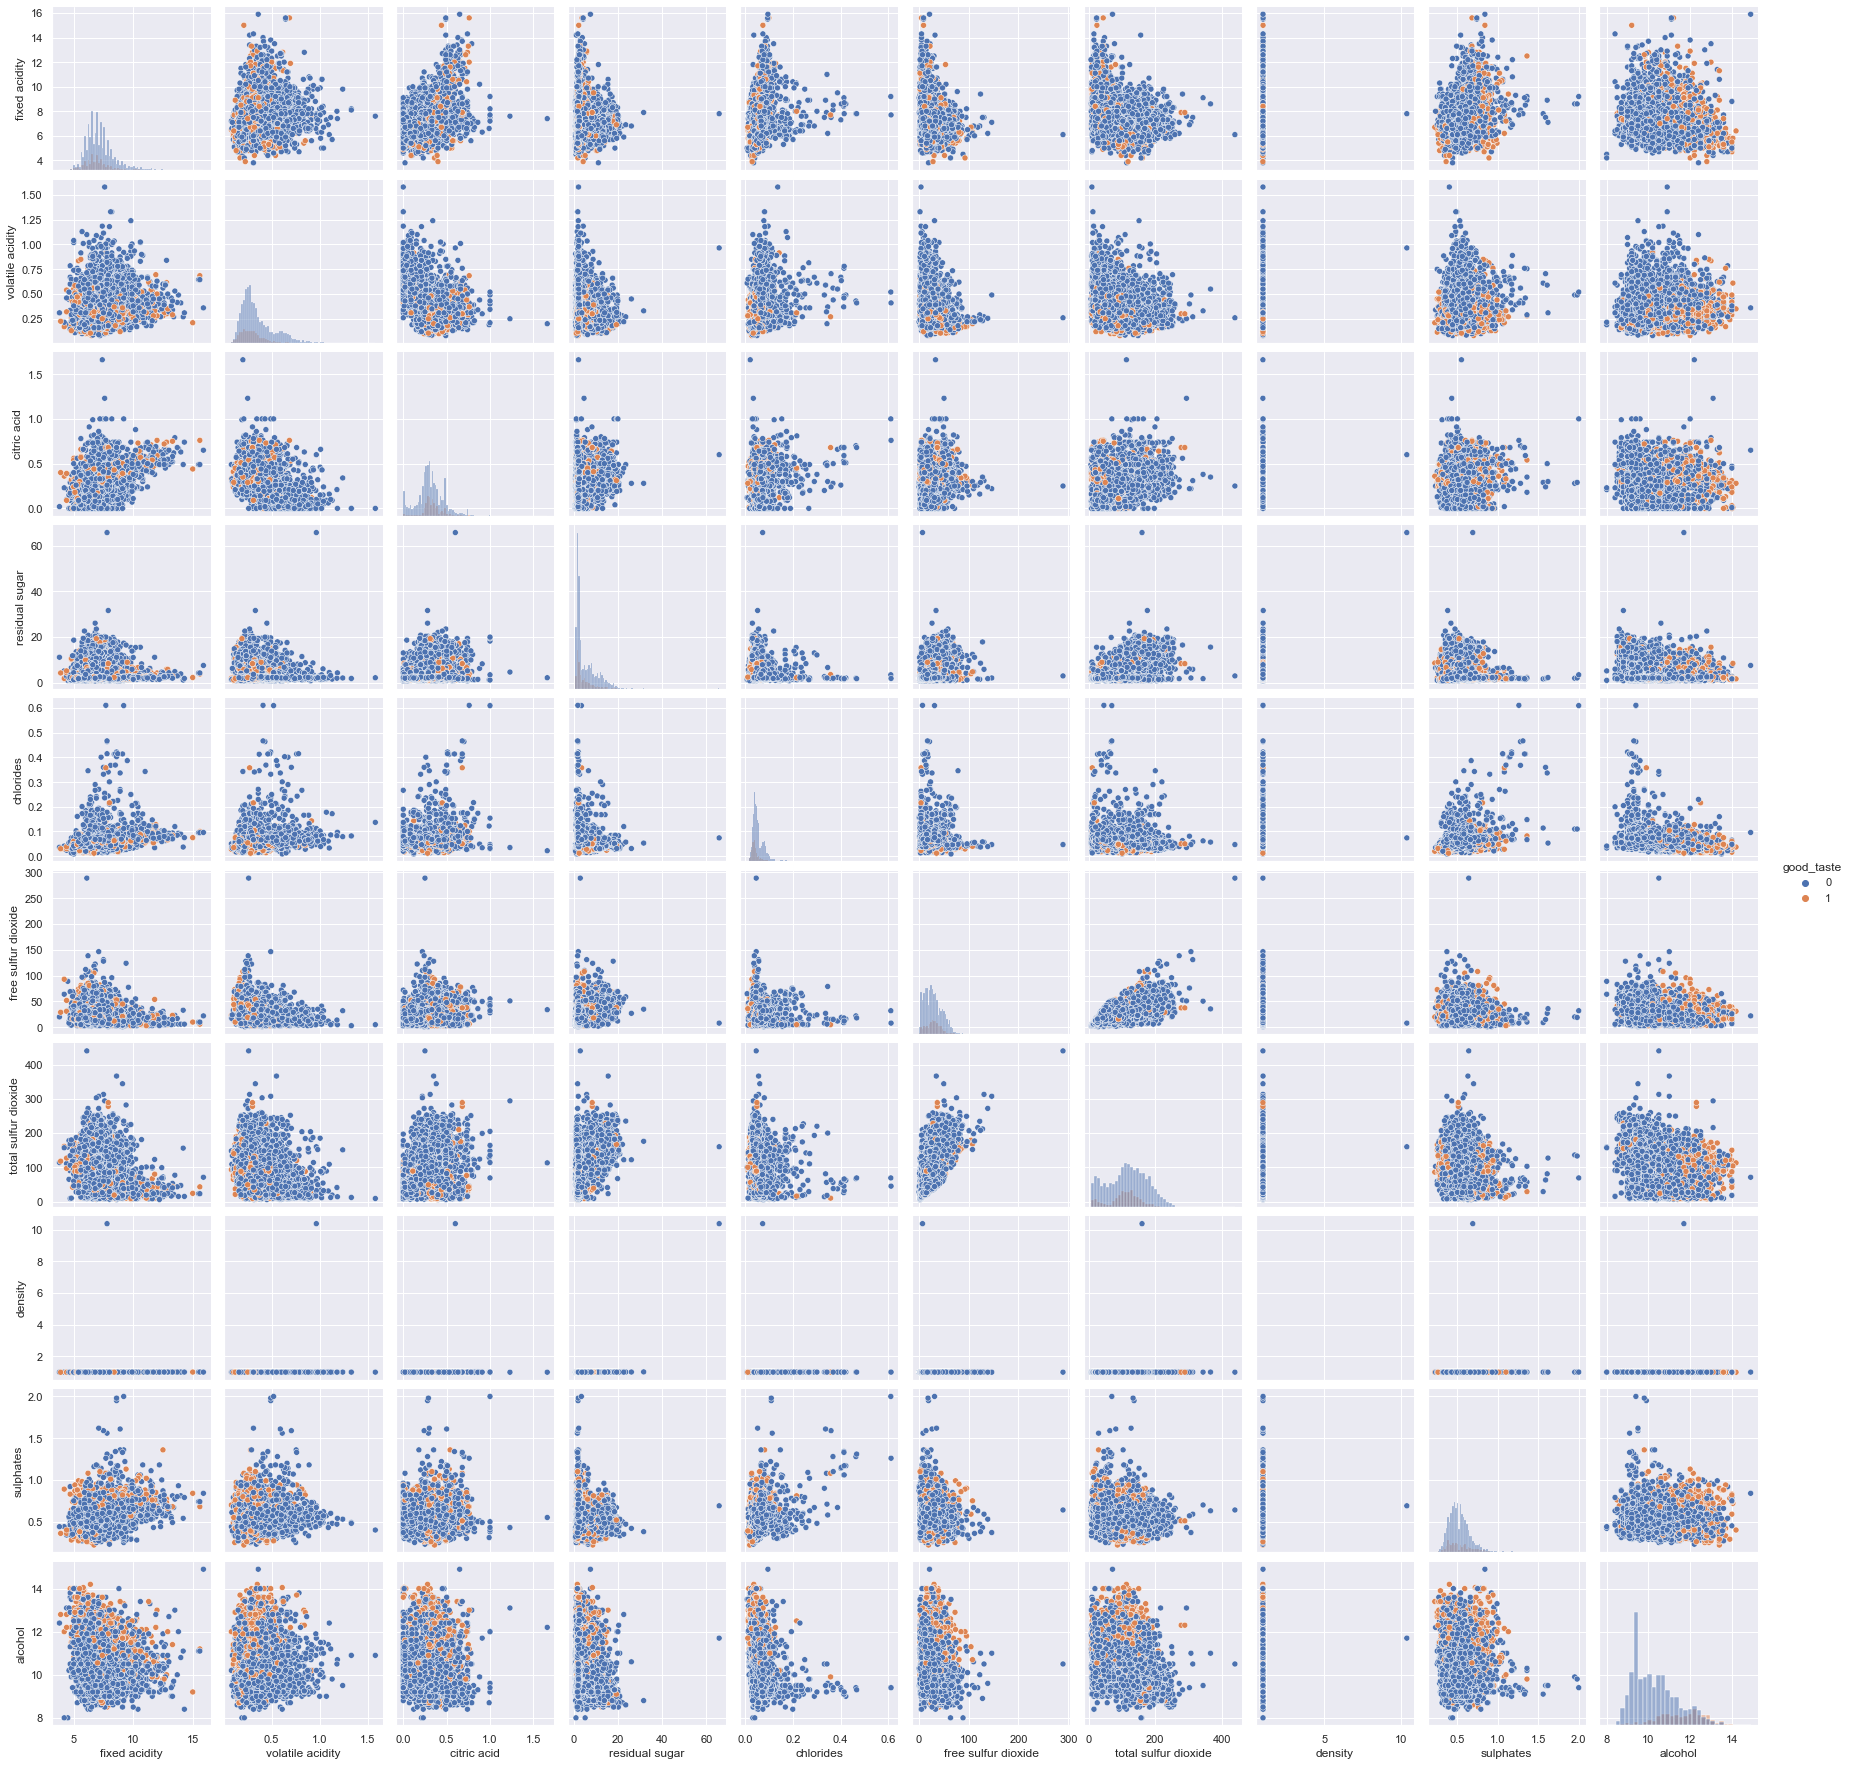

In [31]:
sns.pairplot(df, hue='good_taste',diag_kind="hist");

#### Upon further inspection of the pairplot graph; there are a few possible outliers. Albeit upon further inspection, the only outlier that I truly think may have been an error and negatively impact our model is the feature 'density'. Their is no wine that should have a density of '10+' where all the other values are relatively consistent. The other values in feature spaces: 'residual sugar' , 'alcohol', 'free sulfure dioxide' are all possible values that could not be necessarily outlier, but possible values that reflect true, possible data points. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='good_taste', ylabel='residual sugar'>

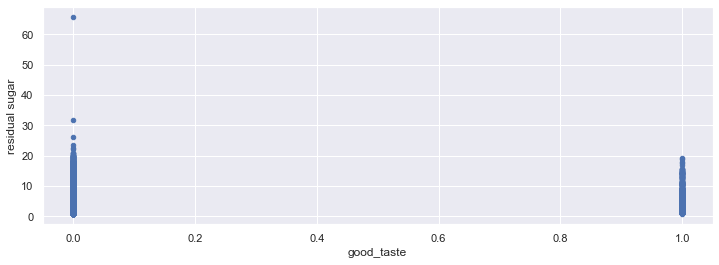

In [32]:
df.plot.scatter(x="good_taste", y ="residual sugar")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='good_taste', ylabel='alcohol'>

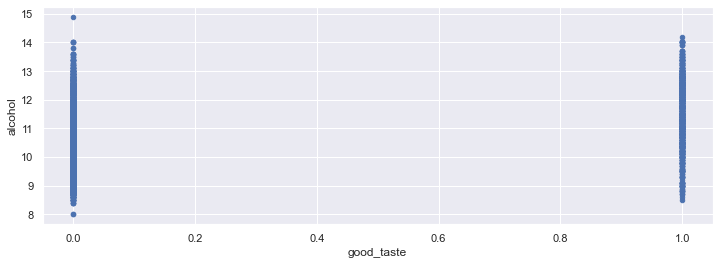

In [33]:
df.plot.scatter(x="good_taste", y ="alcohol")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='good_taste', ylabel='free sulfur dioxide'>

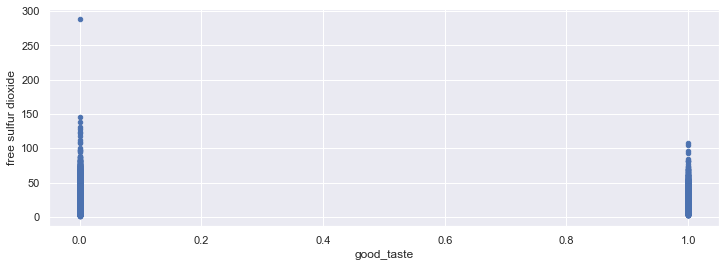

In [34]:
df.plot.scatter(x="good_taste", y ="free sulfur dioxide")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='good_taste', ylabel='density'>

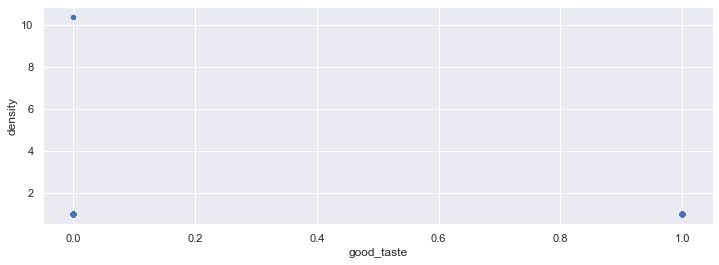

In [35]:
df.plot.scatter(x="good_taste", y ="density")

##### Removing the outliers will only negatively impact our model; these are most likely not mistakes and contains both two types of wine. Understanding that white wine and red wine have varying amounts of residual sugar makes sense.

<AxesSubplot:xlabel='residual sugar'>

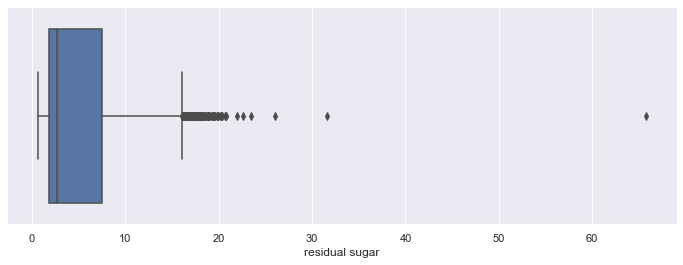

In [36]:
df['residual sugar'].describe()
sns.boxplot(x=df['residual sugar'])

##### Removing the outliers will only negatively impact our model; these are most likely not mistakes and contains both two types of wine. Understanding that white wine and red wine have varying amounts of alcohol makes sense.

<AxesSubplot:xlabel='alcohol'>

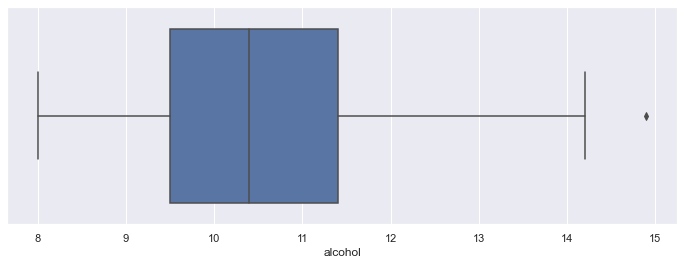

In [37]:
df['alcohol'].describe()
sns.boxplot(x=df['alcohol'])

##### Removing the outliers will only negatively impact our model; these are most likely not mistakes and contains both two types of wine. Understanding that white wine and red wine have varying amounts of free sulfur dioxide makes sense.

<AxesSubplot:xlabel='free sulfur dioxide'>

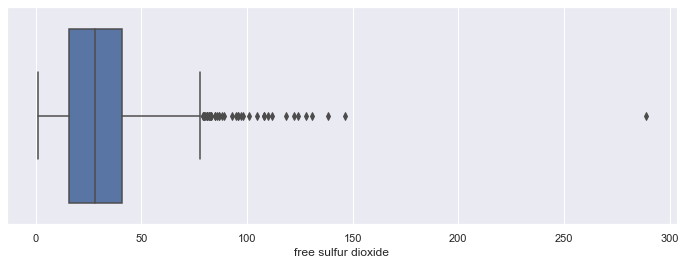

In [38]:
df['free sulfur dioxide'].describe()
sns.boxplot(x=df['free sulfur dioxide'])

##### Red Wine and White Wine are both liquids; the disparaging difference between the density showcased here is clearly an input error, and cleaning this input data point can only help our mode.

<AxesSubplot:xlabel='density'>

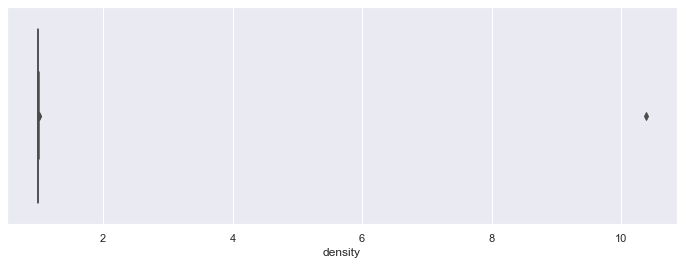

In [39]:
df['density'].describe()
sns.boxplot(x=df['density'])
# This is clearly a mistake that needs rectifying

In [40]:
### display the Outlier
print(f'Number of Entries As of This Point:{df.shape[0]}')
df[df.density > 10]

Number of Entries As of This Point:5320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
2782,7.8,0.965,0.6,65.8,0.074,8.0,160.0,10.3898,0.69,11.7,white,quite acidic,0


In [41]:
print(f'PRIOR REMOVAL OF AGE OUTLIER\n{df.density.describe()}')

PRIOR REMOVAL OF AGE OUTLIER
count    5320.000000
mean        0.996293
std         0.128844
min         0.987110
25%         0.992200
50%         0.994650
75%         0.996770
max        10.389800
Name: density, dtype: float64


In [42]:
df = df[df.density < 10]
print(f'AFTER REMOVAL OF AGE OUTLIER\n{df.density.describe()}')

AFTER REMOVAL OF AGE OUTLIER
count    5319.000000
mean        0.994527
std         0.002902
min         0.987110
25%         0.992200
50%         0.994640
75%         0.996770
max         1.010300
Name: density, dtype: float64


<AxesSubplot:xlabel='density'>

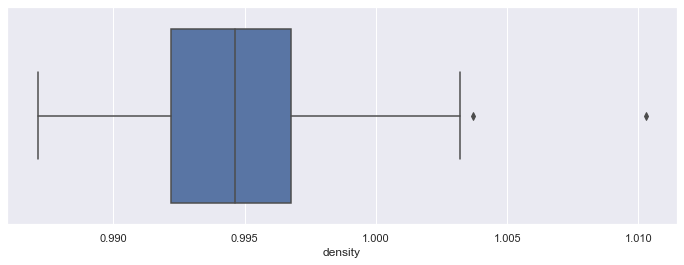

In [43]:
sns.boxplot(x=df['density'])
# This looks much better now

In [44]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
count,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000
mean,7.215069,0.344013,0.318441,5.037056,0.056687,30.040797,114.100395,0.994527,0.533328,10.549025,0.189697
std,1.319770,0.168049,0.147121,4.422815,0.036866,17.804154,56.776073,0.002902,0.149742,1.185939,0.392098
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,0.430000,9.500000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,0.510000,10.400000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996770,0.600000,11.400000,0.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,289.000000,440.000000,1.010300,2.000000,14.900000,1.000000


#### Very Important to Notice that that when we call the 'shape' we have 13 features and yet when we run correlation we don not have all features listed. Correlation only works on numerical|continquous features|variables. We have two columns which will need to be encoded in some manner. Let us see what they are...

In [45]:
df.head(3)
## We still have Two Categorical Variables to look At: type and pHValue

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,0


##### Let Us Inspect the columns that are left for categorical variables

In [46]:
df.select_dtypes(include=['object']).columns.tolist()

['type', 'pHValue']

In [47]:
df.get('type')

0       white
1       white
2       white
3       white
6       white
        ...  
6492      red
6493      red
6494      red
6496      red
6497      red
Name: type, Length: 5319, dtype: object

In [48]:
df.get('pHValue')

0        very acidic
1       quite acidic
2       quite acidic
3        very acidic
6        very acidic
            ...     
6492    midly acidic
6493    midly acidic
6494    midly acidic
6496    midly acidic
6497    quite acidic
Name: pHValue, Length: 5319, dtype: object

#### We have to dummy encode 'type' and 'pHValue', these will transform our categorical variables into continuous similiar to how we handled good_taste and !good_taste. Let us inspect those features.

#### Note do to the large amount of rows(length) of our DataFrame, the above method does not work as intended. Let Us Try a Different Tactic...

#### Another Method 

In [49]:
df['pHValue'].unique()

array(['very acidic', 'quite acidic', 'extremly acidic', 'midly acidic',
       'acidic', 'lightly acidic'], dtype=object)

In [50]:
df['pHValue'].nunique()

6

In [51]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [52]:
df['type'].nunique()

2

#### important to see the class homogenuity or pureness of this feature space(ie: pHValue and type)

<AxesSubplot:xlabel='pHValue', ylabel='count'>

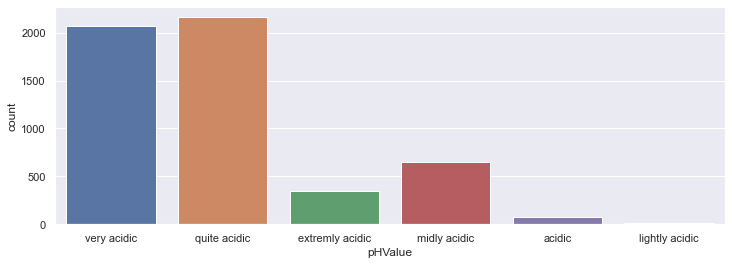

In [53]:
sns.countplot(df['pHValue'])

<AxesSubplot:xlabel='type', ylabel='count'>

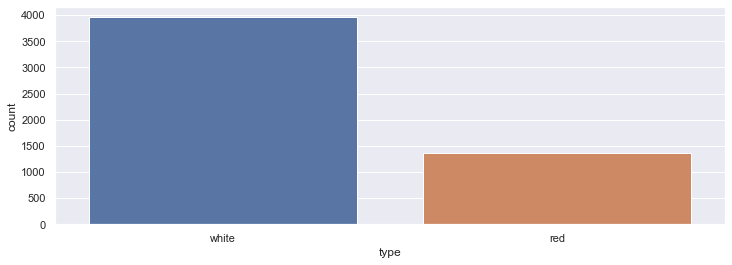

In [54]:
sns.countplot(df['type'])

##### These countplots above tell us that that there are far more red wines in our data than white. This can introduce some bias, and it seems fairly even worse for the PhValues. We need to transform these in numerical, continuous variables and normalize our numerical features. The features with higher values will dominate the learning process. There are some values in our dataframe very low, and there are other values in our dataframe much higher...This needs fixed, we can apply the standard. We can check the normalization using a bar graph of all of our numerical values; let us do this after we dummy encode the values. 

In [55]:
# Let us create a copy to work from 
df_copy = df

In [56]:
#Sanity check
df_copy.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,0


In [57]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,0


In [58]:
df_copy = pd.get_dummies(df_copy, columns=['pHValue', 'type'], drop_first=True)
df_copy.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0,0,0,0,0,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0,0,0,0,1,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0,0,0,0,1,0,1


In [59]:
df_copy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,type_white
count,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000
mean,7.215069,0.344013,0.318441,5.037056,0.056687,30.040797,114.100395,0.994527,0.533328,10.549025,0.189697,0.065238,0.001692,0.122955,0.406467,0.388607,0.744501
std,1.319770,0.168049,0.147121,4.422815,0.036866,17.804154,56.776073,0.002902,0.149742,1.185939,0.392098,0.246968,0.041104,0.328417,0.491220,0.487479,0.436182
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,0.430000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,0.510000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996770,0.600000,11.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,289.000000,440.000000,1.010300,2.000000,14.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df_copy.shape[1]
# Note that we went from a length:13 feature space to Length:17

17

##### Now that we have our dataset in all continuous variables, let us ensure that we do not need to normalize any columns within our feature space; We will accomplish this with the .describe(). We are trying to see if there are a wide present different value ranges. Check the minimum and maximum values

In [61]:
df_copy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,type_white
count,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000
mean,7.215069,0.344013,0.318441,5.037056,0.056687,30.040797,114.100395,0.994527,0.533328,10.549025,0.189697,0.065238,0.001692,0.122955,0.406467,0.388607,0.744501
std,1.319770,0.168049,0.147121,4.422815,0.036866,17.804154,56.776073,0.002902,0.149742,1.185939,0.392098,0.246968,0.041104,0.328417,0.491220,0.487479,0.436182
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,0.430000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,0.510000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996770,0.600000,11.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,289.000000,440.000000,1.010300,2.000000,14.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df_copy.shape[1]

17

##### I believe the dataset does need to be normalized, as the max and means and minimum values are fairly all over the place and the scaling needs helped.

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_copy)
scaled = scaler.fit_transform(df_copy)
scaled_df_copy = pd.DataFrame(scaled, columns=df_copy.columns)

In [64]:
scaled_df_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,type_white
0,0.264463,0.126667,0.216867,0.648387,0.059801,0.152778,0.377880,0.598965,0.129213,0.115942,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.206612,0.146667,0.204819,0.032258,0.066445,0.045139,0.290323,0.297111,0.151685,0.217391,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.355372,0.133333,0.240964,0.203226,0.068106,0.100694,0.209677,0.344545,0.123596,0.304348,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.280992,0.100000,0.192771,0.254839,0.081395,0.159722,0.414747,0.366106,0.101124,0.275362,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.198347,0.160000,0.096386,0.206452,0.059801,0.100694,0.299539,0.335921,0.140449,0.231884,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,0.247934,0.360000,0.048193,0.041935,0.098007,0.093750,0.073733,0.405347,0.337079,0.217391,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5315,0.198347,0.346667,0.048193,0.045161,0.134551,0.107639,0.087558,0.335921,0.202247,0.362319,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5316,0.173554,0.313333,0.060241,0.051613,0.088040,0.131944,0.103687,0.345408,0.303371,0.463768,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5317,0.173554,0.376667,0.072289,0.045161,0.109635,0.107639,0.087558,0.360500,0.275281,0.318841,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### We Have Now Normalized All of Our Data -- Finally Time to Start Working on Building Models

In [66]:
#X are features used to determine 'good_taste'
X = scaled_df_copy.drop('good_taste', axis=1).values
#Y is what we're trying to predict
Y = scaled_df_copy['good_taste'].values

In [67]:
#Split the data
#20% Testing Size; 80%Training Size 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

##### Finally Time to Start Building the Model --> We will build Logistic, Decision Tree Model, and Random Forest

In [68]:
logistic_regression_model = LogisticRegression()

In [69]:
# fit our model with the training data 
logistic_regression_model.fit(X_train,Y_train)

LogisticRegression()

In [70]:
# obtain Y_prediction 
Y_prediction = logistic_regression_model.predict(X_test)

In [71]:
Y_prediction_probability = logistic_regression_model.predict_proba(X_test)[:,1]
Y_prediction_probability.round(2)

array([0.02, 0.1 , 0.26, ..., 0.39, 0.18, 0.03])

In [74]:
logistic_regression_df = pd.DataFrame.from_dict( {'y_true': Y_test, 'y_pred': Y_prediction, 'probability': Y_prediction_probability} )
logistic_regression_df

,y_true,y_pred,probability
0,0.0,0.0,0.017790
1,0.0,0.0,0.096006
2,1.0,0.0,0.264192
3,0.0,0.0,0.045842
4,0.0,0.0,0.150852
...,...,...,...
1059,0.0,0.0,0.154367
1060,0.0,0.0,0.110072
1061,1.0,0.0,0.393183
1062,1.0,0.0,0.176411


In [77]:
from sklearn.metrics import f1_score

f1_score(Y_test,Y_prediction)

0.34931506849315064

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       859
         1.0       0.17      0.08      0.11       205

    accuracy                           0.75      1064
   macro avg       0.49      0.49      0.48      1064
weighted avg       0.68      0.75      0.71      1064

0.7462406015037594
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       859
         1.0       0.22      0.09      0.13       205

    accuracy                           0.76      1064
   macro avg       0.52      0.51      0.50      1064
weighted avg       0.70      0.76      0.72      1064

0.7622180451127819
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       859
         1.0       0.14      0.05      0.08       205

    accuracy                           0.75      1064
   macro avg       0.47      0.49      0.47      1064
weighted avg       0.68      0.75   

<AxesSubplot:xlabel='trial'>

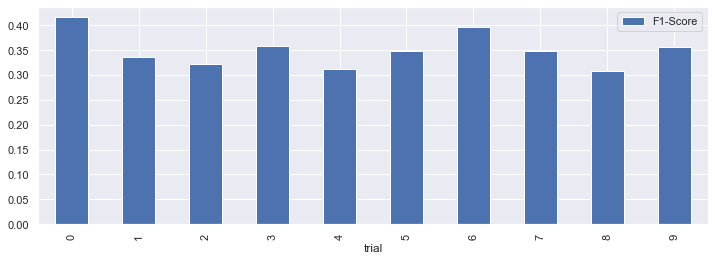

In [110]:
f1_score_holder = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    y_predictions = model.predict(X_test)
    f1_score_holder.append(f1_score(Y_test,y_predictions))
    print(classification_report(Y_test_bag, y_predictions))
    print(accuracy_score(Y_test_bag, y_predictions))
    
logistic_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder})
logistic_model.plot.bar(x='trial', y='F1-Score')

##### This is fairly bad; as the accuracy score seems to range from 30 to 40%. Albeit the F1-Score is fairly low; it is important to note that our model is fairly consistent....

In [111]:
print('Our Logistic Regression F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder)/len(f1_score_holder)*100))

Our Logistic Regression F1 Score Model Scored on K-Validation: 35.044448480045396


### Decision Tree Model

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       859
         1.0       0.17      0.17      0.17       205

    accuracy                           0.67      1064
   macro avg       0.48      0.48      0.48      1064
weighted avg       0.68      0.67      0.68      1064

0.6738721804511278
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       859
         1.0       0.22      0.25      0.23       205

    accuracy                           0.68      1064
   macro avg       0.52      0.52      0.52      1064
weighted avg       0.70      0.68      0.69      1064

0.6823308270676691
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       859
         1.0       0.23      0.26      0.25       205

    accuracy                           0.69      1064
   macro avg       0.53      0.53      0.53      1064
weighted avg       0.71      0.69   

<AxesSubplot:xlabel='trial'>

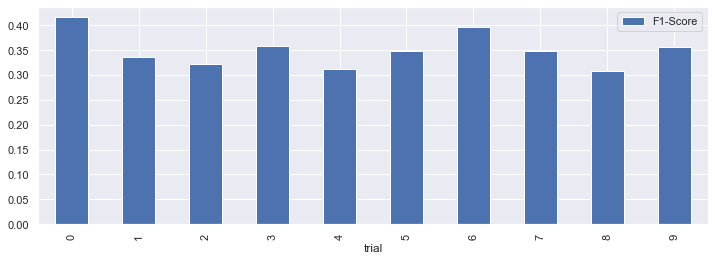

In [112]:
f1_score_holder_2 = []
for i in range(10):
    X_train_tree, X_test_tree, Y_train_tree, Y_test_tree = train_test_split(X, Y, test_size = 0.2)
    model_tree = DecisionTreeClassifier()
    model_tree.fit(X_train_tree, Y_train_tree)
    y_predictions_tree = model_tree.predict(X_test_tree)
    f1_score_holder_2.append(f1_score(Y_test_tree,y_predictions_tree))
    print(classification_report(Y_test_bag, y_predictions_tree))
    print(accuracy_score(Y_test_bag, y_predictions_tree))
    
dtree_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder})
dtree_model.plot.bar(x='trial', y='F1-Score')

#### This was not much better, but still an improvement. It does appear to have been a bit more consistency with the results than our logistic regression model.

In [113]:
print('Our Decision Tree F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_2)/len(f1_score_holder_2)*100))

Our Decision Tree F1 Score Model Scored on K-Validation: 42.291049936208644


              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       859
         1.0       0.19      0.12      0.15       205

    accuracy                           0.73      1064
   macro avg       0.50      0.50      0.49      1064
weighted avg       0.69      0.73      0.71      1064

0.7349624060150376
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       859
         1.0       0.21      0.11      0.15       205

    accuracy                           0.75      1064
   macro avg       0.51      0.50      0.50      1064
weighted avg       0.69      0.75      0.71      1064

0.7453007518796992
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       859
         1.0       0.20      0.10      0.14       205

    accuracy                           0.75      1064
   macro avg       0.51      0.50      0.49      1064
weighted avg       0.69      0.75   

<AxesSubplot:xlabel='trial'>

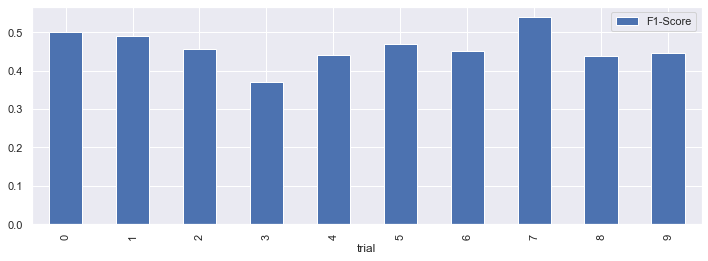

In [114]:
f1_score_holder_3 = []
for i in range(10):
    X_train_rftree, X_test_rftree, Y_train_rftree, Y_test_rftree = train_test_split(X, Y, test_size = 0.2)
    model_rftree = RandomForestClassifier(n_estimators=150)
    model_rftree.fit(X_train_rftree, Y_train_rftree)
    y_predictions_rftree = model_rftree.predict(X_test_rftree)
    f1_score_holder_3.append(f1_score(Y_test_rftree,y_predictions_rftree))
    print(classification_report(Y_test_bag, y_predictions_rftree))
    print(accuracy_score(Y_test_bag, y_predictions_rftree))
    
rfdtree_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_3})
rfdtree_model.plot.bar(x='trial', y='F1-Score')

In [115]:
print('Our Decision Tree F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_3)/len(f1_score_holder_3)*100))

Our Decision Tree F1 Score Model Scored on K-Validation: 45.98702736408507


### XGBoost

In [103]:
X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(X, Y, test_size = 0.2)

In [104]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=100, use_label_encoder=False)
xgb_clf.fit(X_train_xgb, Y_train_xgb)

Y_pred_xgb = xgb_clf.predict(X_test_xgb)

print(classification_report(Y_test_xgb, Y_pred_xgb))
print(accuracy_score(Y_test_xgb, Y_pred_xgb))
print(f1_score(Y_test_xgb,Y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       847
         1.0       0.63      0.43      0.51       217

    accuracy                           0.83      1064
   macro avg       0.75      0.68      0.70      1064
weighted avg       0.82      0.83      0.82      1064

0.831766917293233
0.5095890410958904


              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       846
         1.0       0.59      0.39      0.47       218

    accuracy                           0.82      1064
   macro avg       0.72      0.66      0.68      1064
weighted avg       0.80      0.82      0.80      1064

0.818609022556391
0.46831955922865015
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       877
         1.0       0.57      0.48      0.52       187

    accuracy                           0.84      1064
   macro avg       0.73      0.70      0.71      1064
weighted avg       0.84      0.84      0.84      1064

0.8439849624060151
0.5202312138728323
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       855
         1.0       0.57      0.37      0.45       209

    accuracy                           0.82      1064
   macro avg       0.72      0.65      0.67      106

<AxesSubplot:xlabel='trial'>

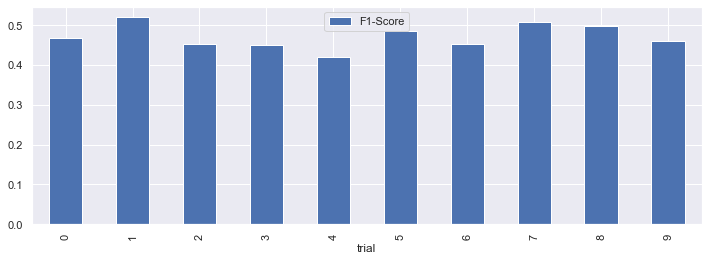

In [105]:
f1_score_holder_4 = []
for i in range(10):
    X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(X, Y, test_size = 0.2)
    xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=100, use_label_encoder=False)
    xgb_clf.fit(X_train_xgb, Y_train_xgb)
    Y_pred_xgb = xgb_clf.predict(X_test_xgb)
    f1_score_holder_4.append(f1_score(Y_test_xgb,Y_pred_xgb))
    print(classification_report(Y_test_xgb, Y_pred_xgb))
    print(accuracy_score(Y_test_xgb, Y_pred_xgb))
    print(f1_score(Y_test_xgb,Y_pred_xgb))
    
xgb_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_4})
xgb_model.plot.bar(x='trial', y='F1-Score')

In [116]:
print('Our XGB BOOST F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_4)/len(f1_score_holder_4)*100))

Our XGB BOOST F1 Score Model Scored on K-Validation: 47.14843469616915


#### Trying Ensemble Techniques ; Bagging Classifier

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       868
         1.0       0.58      0.23      0.33       196

    accuracy                           0.83      1064
   macro avg       0.72      0.60      0.62      1064
weighted avg       0.80      0.83      0.80      1064

0.8280075187969925
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       880
         1.0       0.57      0.24      0.34       184

    accuracy                           0.84      1064
   macro avg       0.71      0.60      0.62      1064
weighted avg       0.81      0.84      0.81      1064

0.8374060150375939
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       867
         1.0       0.61      0.27      0.38       197

    accuracy                           0.83      1064
   macro avg       0.73      0.62      0.64      1064
weighted avg       0.81      0.83   

<AxesSubplot:xlabel='trial'>

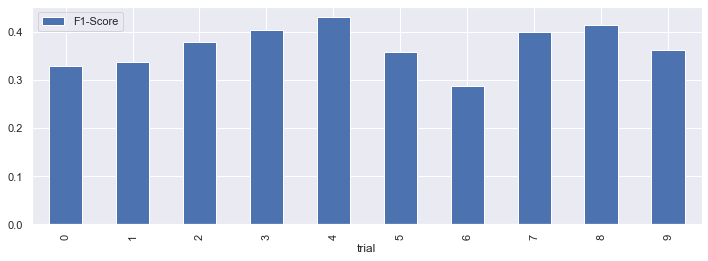

In [108]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

f1_score_holder_5 = []
for i in range(10):
    X_train_bag, X_test_bag, Y_train_bag, Y_test_bag = train_test_split(X, Y, test_size = 0.2)
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=101), n_estimators=500,
        max_samples=100, bootstrap=True)
    bag_clf.fit(X_train_bag, Y_train_bag)
    Y_pred_bag = bag_clf.predict(X_test_bag)
    f1_score_holder_5.append(f1_score(Y_test_bag,Y_pred_bag))
    print(classification_report(Y_test_bag, Y_pred_bag))
    print(accuracy_score(Y_test_bag, Y_pred_bag))

bag_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_5})
bag_model.plot.bar(x='trial', y='F1-Score')

In [109]:
print('Our Bagging F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_5)/len(f1_score_holder_5)*100))

Our Bagging F1 Score Model Scored on K-Validation: 37.011870253115966
